# **Task P8**
## Analyzing Twitter Data using NLP

##### This task focuses on analyzing user replies to Covid-19 news published on the social media platform X (formerly known as Twitter) using some basic natural language processing (NLP) techniques. 

##### The task uses the `replies.csv` dataset, which contains the information about user replies to the Covid-19 news posted on Twitter. The columns capture the content related to the individual replies such as `text` (the actual text content of the reply), `id` (a unique ID for the reply itself), `conversation_id` (linking the reply to a specific conversation thread), `in_reply_to_user_id` (identifying the target user of the reply), and `possibly_sensitive` (indicating if the content may be sensitive). Additional informaiton include `author_id` (the unique ID of the reply's author), `author_followers` (the count of the author's followers),`author_tweets` (total tweets made by the author), and `author_location` (the geographical location of the author). Moreover, engagement metrics are tracked through columns like `retweets`, `replies`, `likes`, and `quote_count`. Time and location metadata are captured by `created_at` and `geo`, respectively, with `account` specifying the account name of the news publishers (e.g., BBC).

<img src="pic.png" alt="SIT112 News Tweets!" width="1800" height="200">

### A. Instructions

1. `To complete this task, you must first study the solution notebook; then try to do it yourself. You can copy the solutions into ChatGPT and ask for clarification or more examples.`
2. Complete and submit the TaskCompletionReport form in PDF format using Ontrack. You can do this by the end of Week 12, but feedback will only be provided for submissions received by 11 AM of the due date.
3. Do **not** include the solution (yours or the one provided to you) in your submission.
4. The workshops are the primary venue for you to seek help if you need any clarification/assitance. The tutors are there to help you complete and submit the tasks. Please avoid emailing your code or screenshots to the tutors outside workshop hours. 
5. Consider using online resources such as ChatGPT to strenghten your undertanding of the task. 

Good luck :)

In [2]:
import importlib
import subprocess

# The following lines should install all libraries you need - you can install the libraries manually if the script did not work 
required_modules = ['pandas', 'seaborn', 'matplotlib', 'numpy', 'datetime', 'sklearn', 'nltk', 'textblob', 'textblob', 'collections', 'numpy', 'warnings']
for module in required_modules:
    try:
        importlib.import_module(module)
    except ImportError:
        print(f"{module} module not found. Installing...")
        subprocess.check_call(['pip', 'install', module])

print("All required modules are installed.")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from textblob import TextBlob
import datetime as dt
from collections import Counter
import re
import warnings
import nltk
from nltk.corpus import stopwords

warnings.filterwarnings('ignore')
# Set the maximum number of columns and rows displayed
pd.set_option('display.max_columns', None)  # None means no limit
pd.set_option('display.max_rows', None)  # None means no limit
# You can also adjust the width of each column and the maximum column width
pd.set_option('display.max_colwidth', None)  # None means no truncation on column width

All required modules are installed.


### B. Write Python code that performs (answers) the following operations (questions) 

##### 1. Read the data from the .csv file into a DataFrame and display the first five rows.

In [3]:
# write your code here
data = pd.read_csv("replies.csv")
data.head(5)

,author_id,author_followers,author_tweets,author_location,id,conversation_id,source,in_reply_to_user_id,possibly_sensitive,text,created_at,geo,retweets,replies,likes,quote_count,account
0,2,1,3827,NaN,1.480000e+18,1.480000e+18,NaN,2.604917e+07,False,@RobinLaRoca @guardian I don't want a payment.\nI want the unvaxxed to pay every last red cent for public hospital treatment rendered to them,2022-01-01T03:31:03Z,NaN,0,2,0,0,guardian
1,3,939,49244,Sheffield,1.480000e+18,1.480000e+18,NaN,8.781841e+07,False,@guardian I'm fine with that as long as they backdate the payments for everyone.,2022-01-01T00:42:39Z,{'place_id': '07e9c7d1954fff64'},0,1,0,0,guardian
2,4,318,4519,"Santiago, Chile",1.480000e+18,1.480000e+18,NaN,8.781841e+07,False,"@guardian Yes, for big pharma",2022-01-01T00:37:59Z,NaN,1,0,1,0,guardian
3,5,2812,320641,Earth,1.480000e+18,1.480000e+18,NaN,1.367531e+06,False,@FoxNews a vaccine most Missourians won’t take,2022-01-01T07:39:51Z,NaN,0,0,5,0,FoxNews
4,6,350,1581,"Conway, AR",1.480000e+18,1.480000e+18,NaN,1.190000e+18,False,"@nikki6ixx1 @FoxNews I currently have Covid, im non vaccinated and feeling perfectly fine. Please explain to me how am I going to die because of this virus??",2022-01-01T13:30:39Z,NaN,0,2,0,0,FoxNews


##### 2. Clean the reply texts as listed below. You can use ChatGPT to generate regular expressions for these cleaning operations. 

- Remove @ Mentions: Strip out any @ mentions in the reply texts, which typically refer to other users and are not relevant for general analysis.
- Remove Hashtags: Eliminate the '#' symbol but keep the subsequent text, which might be relevant for understanding the topic of the reply.
- Remove Retweet Indicators: Remove any 'RT' symbols used to indicate retweets, as they do not contribute to text content.
- Remove URLs: Strip out any web links (URLs), which are common in reply texts but irrelevant to text analysis.
- Remove Punctuation: Eliminate all punctuation marks to reduce variability in the reply texts.
- Convert to Lowercase: Standardize all reply texts to lowercase to ensure uniformity in the analysis.

In [8]:
# Write your code here
def remove_text(text):
    #removing @mentions from the text column
    text = re.sub(r"@\w+", "", text)

    #removing #s from the text
    text = re.sub(r"#", "", text)

    #remove retweet indicator "RT"
    text = re.sub(r"RT", "", text)
    
    #remove URLS
    text = re.sub(r'https?://[^\s<>"]+|www\.[^\s<>"]+', "", text)
    
    #remove puntuation
    text = re.sub(r'[^\w\s]', "", text)

    #convert all the text to lower case
    text = text.lower()

    return text


data["text"] = data["text"].apply(remove_text)
data.head(5)


,author_id,author_followers,author_tweets,author_location,id,conversation_id,source,in_reply_to_user_id,possibly_sensitive,text,created_at,geo,retweets,replies,likes,quote_count,account
0,2,1,3827,NaN,1.480000e+18,1.480000e+18,NaN,2.604917e+07,False,want payment want unvaxxed pay every last red cent public hospital treatment rendered,2022-01-01T03:31:03Z,NaN,0,2,0,0,guardian
1,3,939,49244,Sheffield,1.480000e+18,1.480000e+18,NaN,8.781841e+07,False,im fine long backdate payments,2022-01-01T00:42:39Z,{'place_id': '07e9c7d1954fff64'},0,1,0,0,guardian
2,4,318,4519,"Santiago, Chile",1.480000e+18,1.480000e+18,NaN,8.781841e+07,False,yes big pharma,2022-01-01T00:37:59Z,NaN,1,0,1,0,guardian
3,5,2812,320641,Earth,1.480000e+18,1.480000e+18,NaN,1.367531e+06,False,vaccine missourians wont take,2022-01-01T07:39:51Z,NaN,0,0,5,0,FoxNews
4,6,350,1581,"Conway, AR",1.480000e+18,1.480000e+18,NaN,1.190000e+18,False,currently im non vaccinated feeling perfectly fine please explain die virus,2022-01-01T13:30:39Z,NaN,0,2,0,0,FoxNews


##### 3. Remove from the reply texts the stopwords and the custom list of words that are unwanted:

- Utilize a list of predefined stopwords from NLTK tailored for the English language (from nltk.corpus import stopwords).
- Define a custom list of words to be excluded that are specifically irrelevant or overused in the reply texts.
- Remove stopwords and custom words: filter out these words from the (reply) text to focus on more meaningful words for analysis.

In [9]:
def filter_words(text):
    # Custom list of excluded words
    excluded_words = ['covid', 'covid19', 'covid-19', 'u', 'say', 'said', 'amid', 'weel', 'oh', 'new', 'BCWorld', 
                    'will', 'still', 'someone', 'many', 'now', 'going', 'everyone', 'use', 'let', 'become', 'thing', 
                    'around', 'way', 'know', 'NUM', 'dont']

    # Import stopwords from NLTK
    imported_words = stopwords.words('english')

    # Combine and remove dupalicates
    words_to_be_excluded = set(excluded_words + imported_words)

    new_text = (' ').join(word for word in text.split() if word.lower() not in words_to_be_excluded)

    return new_text

data['text'] = data['text'].apply(filter_words)
data.head(5)

,author_id,author_followers,author_tweets,author_location,id,conversation_id,source,in_reply_to_user_id,possibly_sensitive,text,created_at,geo,retweets,replies,likes,quote_count,account
0,2,1,3827,NaN,1.480000e+18,1.480000e+18,NaN,2.604917e+07,False,want payment want unvaxxed pay every last red cent public hospital treatment rendered,2022-01-01T03:31:03Z,NaN,0,2,0,0,guardian
1,3,939,49244,Sheffield,1.480000e+18,1.480000e+18,NaN,8.781841e+07,False,im fine long backdate payments,2022-01-01T00:42:39Z,{'place_id': '07e9c7d1954fff64'},0,1,0,0,guardian
2,4,318,4519,"Santiago, Chile",1.480000e+18,1.480000e+18,NaN,8.781841e+07,False,yes big pharma,2022-01-01T00:37:59Z,NaN,1,0,1,0,guardian
3,5,2812,320641,Earth,1.480000e+18,1.480000e+18,NaN,1.367531e+06,False,vaccine missourians wont take,2022-01-01T07:39:51Z,NaN,0,0,5,0,FoxNews
4,6,350,1581,"Conway, AR",1.480000e+18,1.480000e+18,NaN,1.190000e+18,False,currently im non vaccinated feeling perfectly fine please explain die virus,2022-01-01T13:30:39Z,NaN,0,2,0,0,FoxNews


##### 4. What are the 5 most frequent words in the replies per account (news publisher, e.g., BBC)?

In [ ]:
#function to extract the list of words from text
def find_words(text):
    return re.findall(r'\b\w+\b', text.lower())

#add a column with the list of words
data['words'] = data['text'].apply(find_words)

#group data per account adding the number of words
grouped_data = data.groupby('account')['words'].sum()

#get the most frequent words
def get_most_frequent_words(list):
    return Counter(list).most_common(5)

top_words_per_account = grouped_data.apply(get_most_frequent_words)

account
9NewsAUS                   [(vaccine, 38), (get, 38), (like, 34), (people, 28), (would, 23)]
BBCWorld              [(people, 105), (vaccine, 99), (get, 93), (vaccinated, 85), (one, 61)]
CBC                                    [(go, 3), (lies, 3), (every, 2), (day, 2), (news, 2)]
CNN              [(people, 381), (get, 305), (vaccine, 300), (vaccinated, 212), (like, 173)]
FoxNews          [(people, 567), (get, 478), (vaccine, 462), (like, 315), (vaccinated, 286)]
MSNBC                         [(people, 87), (vaccine, 35), (get, 32), (amp, 31), (one, 31)]
SkyNews         [(people, 129), (vaccine, 100), (vaccinated, 78), (get, 77), (vaccines, 53)]
guardian                    [(people, 54), (vaccine, 36), (like, 25), (need, 24), (get, 22)]
timesofindia    [(vaccine, 25), (people, 15), (modi, 14), (ao2022, 12), (novakdjokovic, 12)]
Name: words, dtype: object

##### 5. Classify the sentiment of each reply as positive, negative, or neutral based on the `text` column. Then visualize the ratio of the replies with positive, negative, or neutral sentiments per news publisher (account). 


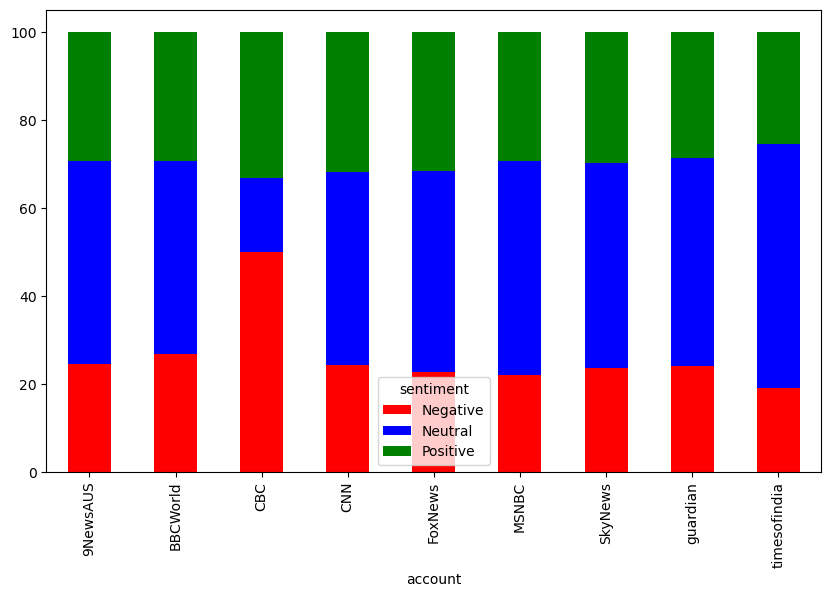

In [28]:
# get the sentiment from the text
def get_sentiment(text):
    sentiment = TextBlob(text)
    if sentiment.sentiment.polarity > 0:
        return 'Positive'
    elif sentiment.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

#create a new column with the sentiment
data['sentiment'] = data['text'].apply(get_sentiment)
data.head(5)

#group the data by account counting sentiment
sentiment_per_account = data.groupby('account')['sentiment'].value_counts(normalize=True).unstack(fill_value=0)

sentiment_per_account = sentiment_per_account * 100

sentiment_per_account.plot(kind="bar",stacked=True, color=['red','blue','green'], figsize=(10,6))

plt.title = "Sentiment Distribution per account"

### C. Learn more
* https://www.sciencedirect.com/science/article/pii/S2468696423000125
* https://youtu.be/toM78JGJ_4s?si=8ESJ-yOV_H1iX74r
* https://youtu.be/QpzMWQvxXWk?si=CPvNgnZo3jsW4HL5
* https://youtu.be/o7OqhzMcDfs?si=9iFeYZq4TlVCMMRb